Dataset Preview:


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None

Missing Values in Dataset:
price               0
area                0
bedrooms            0
bathrooms           0
stories           

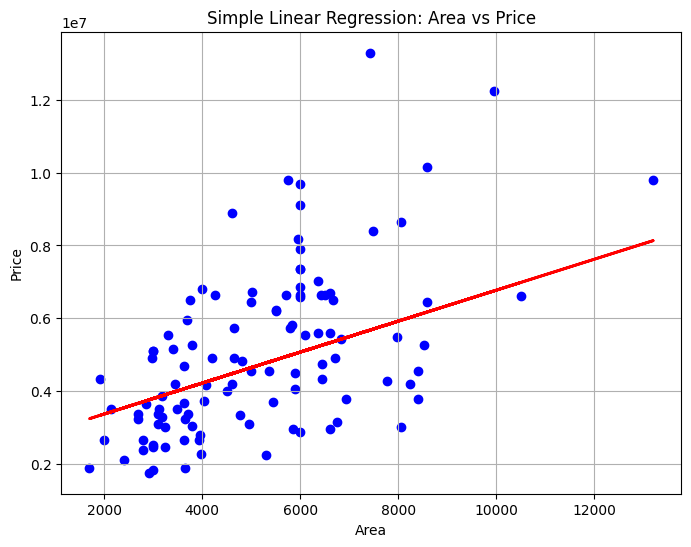


Multiple Linear Regression Evaluation:
Mean Absolute Error (MAE): 970043.40
Mean Squared Error (MSE): 1754318687330.66
R² Score: 0.65


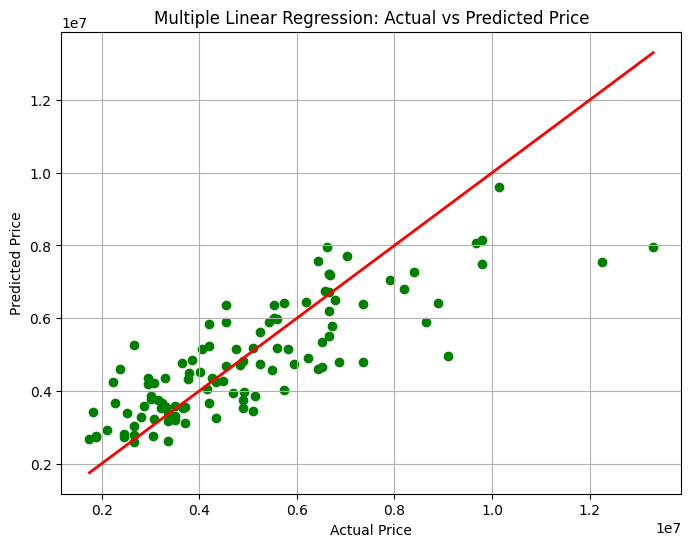


Multiple Linear Regression Coefficients:


,Coefficient
area,2.359688e+02
bedrooms,7.677870e+04
bathrooms,1.094445e+06
stories,4.074766e+05
parking,2.248419e+05
mainroad_yes,3.679199e+05
guestroom_yes,2.316100e+05
basement_yes,3.902512e+05
hotwaterheating_yes,6.846499e+05
airconditioning_yes,7.914267e+05



 Successfully completed Simple and Multiple Linear Regression Models on Housing Price Dataset!


In [2]:
# ======================================
# Housing Price Prediction using Linear Regression
# ======================================

# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ======================================
# Step 1: Load and Explore the Dataset
# ======================================

# Load the dataset
df = pd.read_csv('/content/Housing.csv')

# Preview the dataset
print("Dataset Preview:")
display(df.head())

# Dataset Information
print("\nDataset Info:")
print(df.info())

# ======================================
# Step 2: Preprocessing the Dataset
# ======================================

# Check for missing values
print("\nMissing Values in Dataset:")
print(df.isnull().sum())

# Convert categorical variables to dummy/indicator variables
df = pd.get_dummies(df, drop_first=True)

# ======================================
# Step 3: Simple Linear Regression (area vs price)
# ======================================

# Feature and Target selection
X_simple = df[['area']]  # Only 'area' feature
y = df['price']

# Train-test split
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# Model Training
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train_simple)

# Prediction
y_pred_simple = simple_model.predict(X_test_simple)

# Evaluation Metrics
print("\nSimple Linear Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_simple, y_pred_simple):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_simple, y_pred_simple):.2f}")
print(f"R² Score: {r2_score(y_test_simple, y_pred_simple):.2f}")

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(X_test_simple, y_test_simple, color='blue')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.grid(True)
plt.show()

# ======================================
# Step 4: Multiple Linear Regression (all features)
# ======================================

# Feature and Target selection
X_multi = df.drop('price', axis=1)
y = df['price']

# Train-test split
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y, test_size=0.2, random_state=42)

# Model Training
multi_model = LinearRegression()
multi_model.fit(X_train_multi, y_train_multi)

# Prediction
y_pred_multi = multi_model.predict(X_test_multi)

# Evaluation Metrics
print("\nMultiple Linear Regression Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test_multi, y_pred_multi):.2f}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test_multi, y_pred_multi):.2f}")
print(f"R² Score: {r2_score(y_test_multi, y_pred_multi):.2f}")

# Visualization
plt.figure(figsize=(8,6))
plt.scatter(y_test_multi, y_pred_multi, color='green')
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], color='red', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression: Actual vs Predicted Price')
plt.grid(True)
plt.show()

# Model Coefficients
print("\nMultiple Linear Regression Coefficients:")
coefficients = pd.DataFrame(multi_model.coef_, X_multi.columns, columns=['Coefficient'])
display(coefficients)

# ======================================
# Conclusion
# ======================================

print("\n Successfully completed Simple and Multiple Linear Regression Models on Housing Price Dataset!")
